<a href="https://colab.research.google.com/github/izzul112/ML_BMLT-Proyek_Pertama-Predictive_Analytics-Klasifikasi/blob/main/Proyek_Pertama_Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laporan Proyek Machine Learning - Habib Azizul Haq**

# Domain Proyek
Klasifikasi Harga Handphone (HP).

Saat ini hp sudah sangat mudah untuk dimiliki oleh hampir semua orang, mulai dari yg harganya ratusan ribu hingga puluhan juta, tentu tergantung pada kebutuhan masing-masing orang, ada yang menganggap harga puluhan juta itu wajar dan ada yang mengangggapnya itu kemahalan.

# Rubrik/Kriteria Tambahan (Opsional):

*   Hal tersebut tentu membuat kita kadang tidak jadi membeli suatu hp, karena kita khawatir apakah nanti semua fitur tersebut Gimmik atau bukan.
*   Kita kadang juga merasa khawatir apakah semua fitur di suatu hp tersebut secara harga sesuai apa tidak, tentu kita tidak ingin terkena *genjutsu* sales-sales hp di toko yang mengatakah "Beli hp ini aja kak, PUBG rata kanan semua!", namun setelah di rumah kita baru sadar kok beli hp yang ini? padahal tadi maunya bukan yang ini.
*   Sebagai orang yang jarang tau berita tentang teknologi, dan sedang mencari hp dengan kelas harga tertentu kita kadang bingung dan kesusahan dalam menentukan pilihan


Solusi dari masalah tersebut, kita kembangkan sebuah model Machine Learning (ML) untuk membantu kita yang kesulitan menentukan sebuah rentang kelas harga dari hp, apakah hp dengan spesifikasi sekian-sekian yang berada di kelas harga menengah, apakah sesuai dengan kelas harganya, atau kita di tipu oleh sales-sales hp, karena mereka ingin prodak tersebut segera habis.

*   Referensi
*   List item




# Business Understanding

**Problem Statements**
Menjelaskan pernyataan masalah latar belakang:

*   Dari serangkaian fitur yang ada, fitur apa yang paling berpengaruh terhadap kelas harga suatu hp?
*   Berapa kelas harga pasar hp dengan karakteristik atau fitur tertentu?

**Goals**
Menjelaskan tujuan dari pernyataan masalah:

*   Mengetahui fitur yang paling berkorelasi dengan kelas harga hp.
*   Membuat model machine learning yang dapat memprediksi kelas harga hp seakurat mungkin berdasarkan fitur-fitur yang ada.


# Rubrik/Kriteria Tambahan (Opsional):
Menambahkan bagian “Solution Statement” yang menguraikan cara untuk meraih goals. Bagian ini dibuat dengan ketentuan sebagai berikut:

**Solution statements**

*   Mengajukan 2 atau lebih solution statement. Misalnya, menggunakan dua atau lebih algoritma untuk mencapai solusi yang diinginkan atau melakukan improvement pada baseline model dengan hyperparameter tuning.
*   Solusi yang diberikan harus dapat terukur dengan metrik evaluasi.


# **Data Understanding**
Paragraf awal bagian ini menjelaskan informasi mengenai data yang Anda gunakan dalam proyek. Sertakan juga sumber atau tautan untuk mengunduh dataset. Contoh: UCI Machine Learning Repository.

Selanjutnya uraikanlah seluruh variabel atau fitur pada data. Sebagai contoh:

Variabel-variabel pada Restaurant UCI dataset adalah sebagai berikut:
accepts : merupakan jenis pembayaran yang diterima pada restoran tertentu.
cuisine : merupakan jenis masakan yang disajikan pada restoran.
dst
*   List item
*   List item

# Rubrik/Kriteria Tambahan (Opsional):
Melakukan beberapa tahapan yang diperlukan untuk memahami data, contohnya teknik visualisasi data atau exploratory data analysis.

*   List item
*   List item




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
# load the dataset
data_train = pd.read_csv('train.csv')
data_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
data_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
# ngecek apakah ada kolom yg null / kosong tidak ada nilainya
data_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
# data understanding

# **Data Preparation**
Pada bagian ini Anda menerapkan dan menyebutkan teknik data preparation yang dilakukan. Teknik yang digunakan pada notebook dan laporan harus berurutan.

# Rubrik/Kriteria Tambahan (Opsional):

Menjelaskan proses data preparation yang dilakukan
Menjelaskan alasan mengapa diperlukan tahapan data preparation tersebut.


In [7]:
from sklearn.model_selection import train_test_split
 
X = data_train.drop(["price_range"],axis =1)
y = data_train["price_range"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [8]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 2000
Total # of sample in train dataset: 1800
Total # of sample in test dataset: 200


# **Modeling**
Tahapan ini membahas mengenai model machine learning yang digunakan untuk menyelesaikan permasalahan. Anda perlu menjelaskan tahapan dan parameter yang digunakan pada proses pemodelan.

# Rubrik/Kriteria Tambahan (Opsional):

Menjelaskan kelebihan dan kekurangan dari setiap algoritma yang digunakan.
Jika menggunakan satu algoritma pada solution statement, lakukan proses improvement terhadap model dengan hyperparameter tuning. Jelaskan proses improvement yang dilakukan.
Jika menggunakan dua atau lebih algoritma pada solution statement, maka pilih model terbaik sebagai solusi. Jelaskan mengapa memilih model tersebut sebagai model terbaik.

In [9]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [11]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)          

In [12]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# **Evaluation**
Pada bagian ini anda perlu menyebutkan metrik evaluasi yang digunakan. Lalu anda perlu menjelaskan hasil proyek berdasarkan metrik evaluasi yang digunakan.

Sebagai contoh, Anda memiih kasus klasifikasi dan menggunakan metrik akurasi, precision, recall, dan F1 score. Jelaskan mengenai beberapa hal berikut:

Penjelasan mengenai metrik yang digunakan
Menjelaskan hasil proyek berdasarkan metrik evaluasi
Ingatlah, metrik evaluasi yang digunakan harus sesuai dengan konteks data, problem statement, dan solusi yang diinginkan.

# Rubrik/Kriteria Tambahan (Opsional):

Menjelaskan formula metrik dan bagaimana metrik tersebut bekerja.

In [13]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse

,train,test
KNN,0.000043,0.000055
RF,0.000011,0.000085
Boosting,0.000132,0.000173


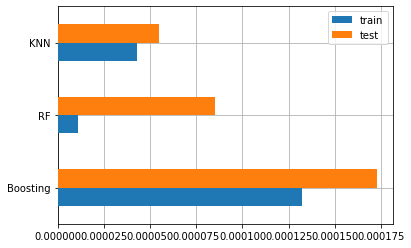

In [14]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [15]:
from sklearn.metrics import mean_absolute_error

# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mae = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mae.loc[name, 'train'] = mean_absolute_error(y_true=y_train, y_pred=model.predict(X_train), multioutput='uniform_average')
    mae.loc[name, 'test'] = mean_absolute_error(y_true=y_test, y_pred=model.predict(X_test), multioutput='uniform_average')

# mean_absolute_error(y_true=y_train, y_pred=model.predict(X_train), multioutput='raw_values')

mae

,train,test
KNN,0.116,0.1375
RF,0.062667,0.1814
Boosting,0.296188,0.334646


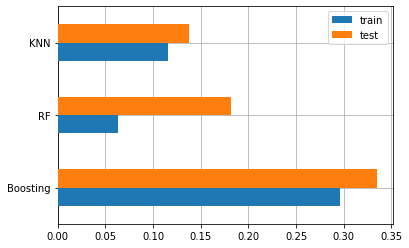

In [16]:
fig, ax = plt.subplots()
mae.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [17]:
prediksi = X_test.iloc[:20].copy()
pred_dict = {'y_true':y_test[:20]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
1342,1,1.0,1.0,1.2
1338,3,3.0,3.0,2.9
189,3,3.0,3.0,2.9
1332,1,0.6,0.5,0.8
1816,3,3.0,2.7,2.6
1685,3,3.0,3.0,2.9
657,1,1.0,1.0,1.3
1846,0,0.0,0.0,0.6
554,0,0.0,0.0,0.1
1963,1,1.0,0.9,1.3
